## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
metadata = pd.read_csv(r"C:\Users\irela\Documents\My_Projects\skin_lesion_classification\data\HAM10000_metadata")
metadata

lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

            dataset  
0      vidir_modern  
1      vidir_modern  
2      vidir_modern  
3      vidir_modern  
4      vidir_modern  
...             ...  
10010  vidir_modern  
10011  vidir_modern  
10012  vidir_modern  
10013  vidir_modern  
10014  vidir_modern  

[10015 rows x 8 columns]

## Metadata Distribution

<Axes: xlabel='dx', ylabel='count'>

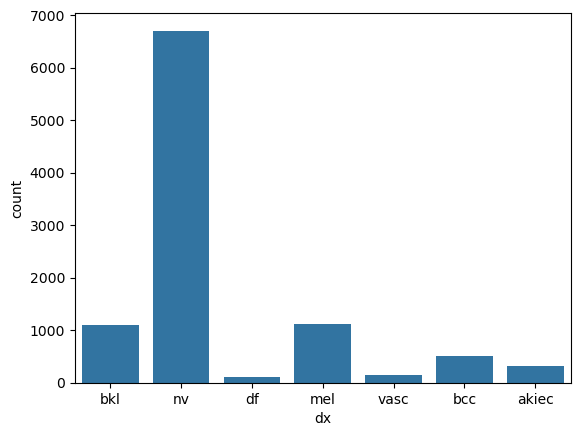

In [3]:
sns.countplot(metadata, x='dx')

<Axes: xlabel='dx_type', ylabel='count'>

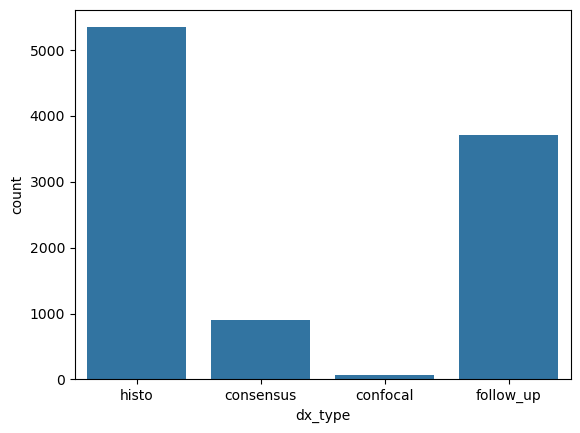

In [4]:
sns.countplot(metadata, x='dx_type')

<Axes: xlabel='sex', ylabel='age'>

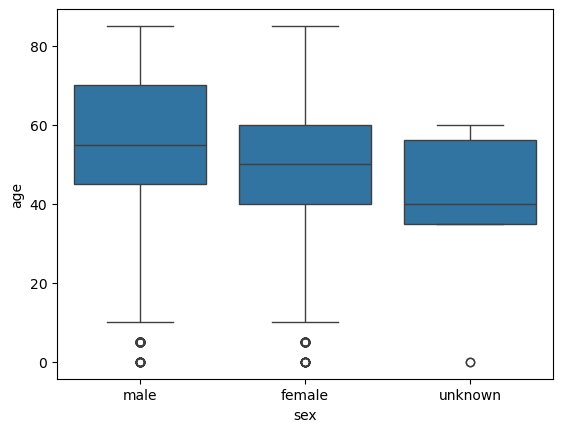

In [5]:
sns.boxplot(metadata, x='sex', y='age')

<Axes: xlabel='sex', ylabel='count'>

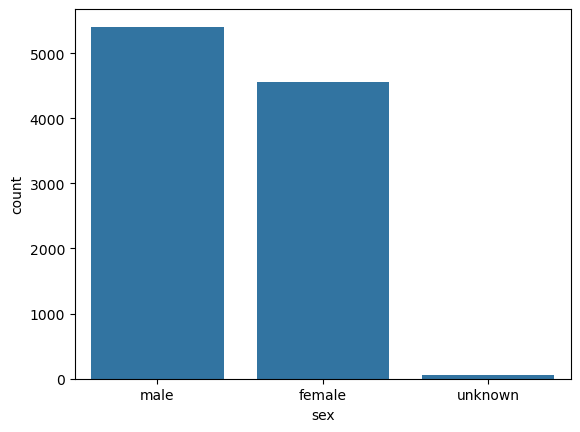

In [6]:
sns.countplot(metadata, x='sex')

In [7]:
plt = sns.countplot(metadata, x='localization')
plt.set_xticklabels(plt.get_xticklabels(), rotation=90)

C:\Users\irela\AppData\Local\Temp\ipykernel_30448\4221668340.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.set_xticklabels(plt.get_xticklabels(), rotation=90)


[Text(0, 0, 'scalp'),
 Text(1, 0, 'ear'),
 Text(2, 0, 'face'),
 Text(3, 0, 'back'),
 Text(4, 0, 'trunk'),
 Text(5, 0, 'chest'),
 Text(6, 0, 'upper extremity'),
 Text(7, 0, 'abdomen'),
 Text(8, 0, 'unknown'),
 Text(9, 0, 'lower extremity'),
 Text(10, 0, 'genital'),
 Text(11, 0, 'neck'),
 Text(12, 0, 'hand'),
 Text(13, 0, 'foot'),
 Text(14, 0, 'acral')]

## Now to inspect images

In [8]:
ex_dx = metadata.groupby('dx').first()
ex_dx

lesion_id      image_id    dx_type   age     sex     localization  \
dx                                                                           
akiec  HAM_0002644  ISIC_0029417      histo  80.0  female             neck   
bcc    HAM_0000781  ISIC_0028155      histo  50.0    male             back   
bkl    HAM_0000118  ISIC_0027419      histo  80.0    male            scalp   
df     HAM_0005276  ISIC_0027008      histo  75.0    male             back   
mel    HAM_0000871  ISIC_0025964      histo  40.0  female            chest   
nv     HAM_0001751  ISIC_0024698  consensus  70.0    male             face   
vasc   HAM_0006889  ISIC_0031197      histo  20.0    male  upper extremity   

            dataset  
dx                   
akiec  vidir_modern  
bcc    vidir_modern  
bkl    vidir_modern  
df     vidir_modern  
mel    vidir_modern  
nv     vidir_modern  
vasc   vidir_modern

In [44]:
print(ex_dx.index)

Index(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype='object', name='dx')


akiec


bcc


bkl


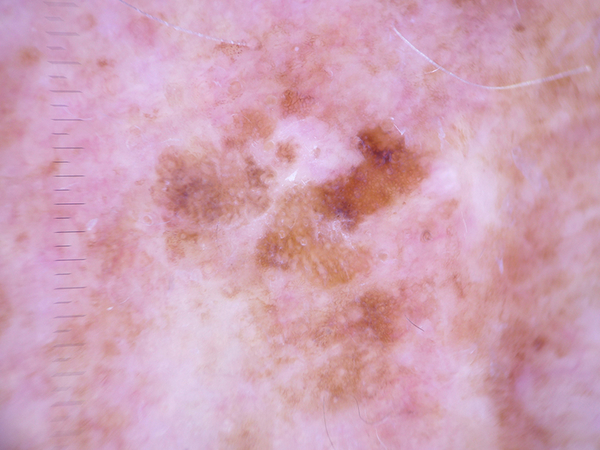

df


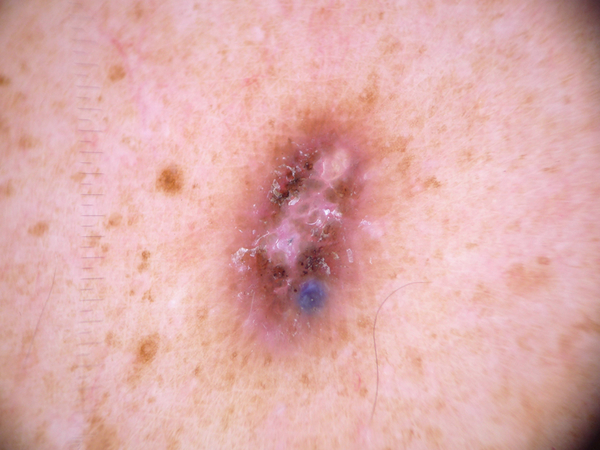

mel


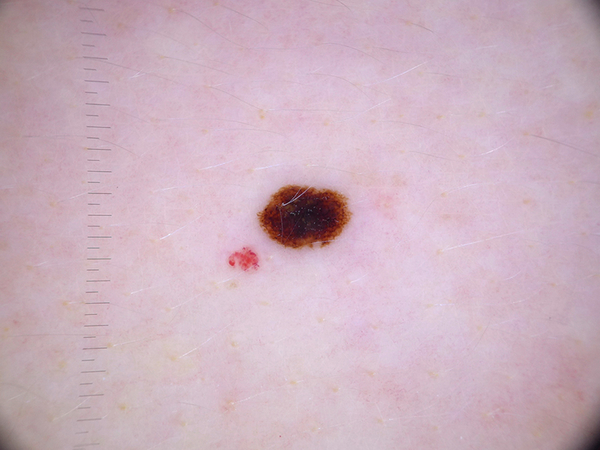

nv


vasc


In [46]:
from IPython.display import Image
images = {id:dx for id, dx in zip(ex_dx['image_id'], ex_dx.index)}
for image, dx in images.items():
    print(dx)
    display(Image(filename=f'../data/HAM10000_images/{image}.jpg'))
